In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import statistics
import re
from operator import itemgetter
from collections import Counter

from functions import progressbar, filter_df, student_scores, unique_students

In [126]:
complete_df = pd.read_pickle('complete_dataframe')
filtered_df = pd.read_pickle('std_filtered_dataframe')
filtered_df = filtered_df[filtered_df.assignment.str.contains('A2016')]

uni_complete = unique_students(complete_df[complete_df.assignment.str.contains('A2016')])
uni_filtered = unique_students(filtered_df)

In [409]:
testing = pd.read_pickle('complete_dataframe')
len(unique_students(student_scores(testing, 90)))

# a = len(unique_students(testing[testing.assignment.str.contains('A2016/Z1/Z1/')]))
# b = len(unique_students(testing[testing.assignment.str.contains('B2016/Z1/Z1/')]))
# c = len(unique_students(testing[testing.assignment.str.contains('A2017/Z1/Z1/')]))
# d = len(unique_students(testing[testing.assignment.str.contains('B2017/Z1/Z1/')]))

1119

In [411]:
tags_dict = {}

for student in uni_complete:
    tags_dict[student] = {'failed': False, 'plagiarism': False, 'quit': False}

paths = sorted(set(filtered_df[filtered_df.assignment.str.contains('A2016')].assignment.to_list()))

In [4]:
# create list of lists of students and if they submitted an assignment
nr_submitted = {}
for ass in progressbar(paths):
    temp_stu = unique_students(filtered_df[filtered_df['assignment'] == ass])
    for student in uni_filtered:
        # 1 if submitted, 0 if nothing
        if student in temp_stu:
            nr_submitted[student] = nr_submitted.get(student, []) + [1]
        else:
            nr_submitted[student] = nr_submitted.get(student, []) + [0]


sorted_submitted = []
nr_submitted_sum = []
for key, value in nr_submitted.items():
    sorted_submitted.append([key, value])
    nr_submitted_sum.append(sum(value))
sorted_submitted.sort(key= lambda x: (x[1].count(0), sum(x[1])))
# sorted(nr_submitted_sum)

18/18


In [5]:
# make list of students who did not start (dns)
def stat(values):
    mean = statistics.mean(values)
    values = np.array(values)
    std = np.std(values)
    cutoff = mean-std
    print(mean, std, cutoff)
    return cutoff

dns = set()
submitted_sum_1 = []
submitted_sum_2 = []

for key, value in nr_submitted.items():
    submitted_sum_1.append(sum(value[:11]))
    submitted_sum_2.append(sum(value[11:]))

cutoff1 = stat(submitted_sum_1)
cutoff2 = stat(submitted_sum_2)

# check how many student dns for different ranges
for i in range(0,19):
    temp=set()
    for student in sorted_submitted:
        if student[1].count(1) == i:
            temp.add(student[0])
    # print(i, len(temp))

cutoff1, cutoff2
# print("")
# print('studenten die onder de cutoff point zitten in 1e helft')
# print('maar die 3 of meer opdrachten in de 2e helft hebben ingeleverd')

#gekozen voor cutoff value van 1 of minder bij DNS
for key,value in nr_submitted.items():
    if sum(value[:11]) <= cutoff1 and sum(value[11:]) <= 1:
        # print(key, value)
        dns.add(key)

for student in dns:
    tags_dict[student]['dns'] = True

submitted_active = [[student[0], student[1]] for student in sorted_submitted if student[0] not in dns]

8.382207578253707 2.5526830675266883 5.829524510727019
1.415156507413509 1.9164511752980156 -0.5012946678845065


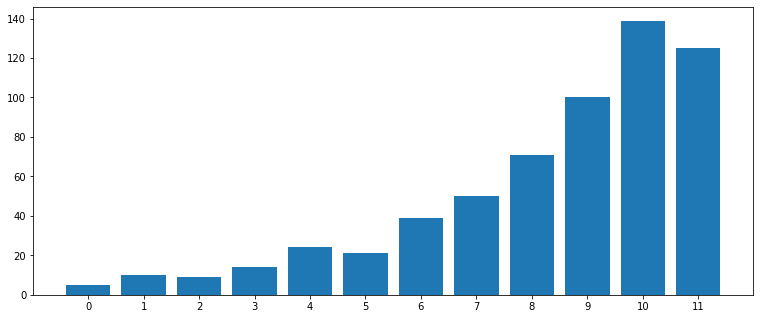

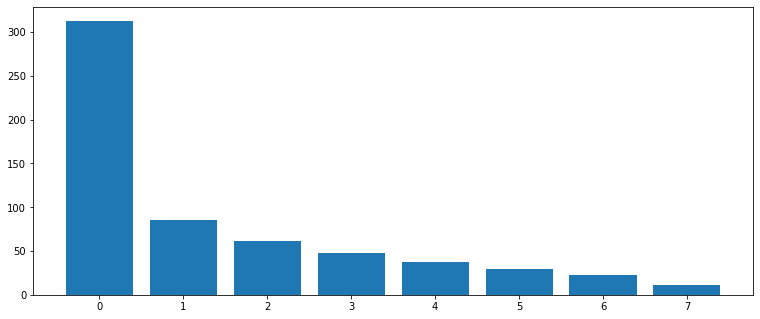

In [6]:
count = Counter(submitted_sum_1)
count_list = []
numbers = []
for x in range(len(count)):
    count_list.append(count[x])
    numbers.append(str(x))

fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(numbers,count_list)
plt.show()

count2 = Counter(submitted_sum_2)
count_list2 = []
numbers2 = []
for x in range(len(count2)):
    count_list2.append(count2[x])
    numbers2.append(str(x))

fig2 = plt.figure(figsize=(10,4))
ax = fig2.add_axes([0,0,1,1])
ax.bar(numbers2,count_list2)
plt.show()

In [412]:
# finding students who failed in a2016 and had to restart in a2017, also not in dns
uni_2016 = unique_students(complete_df[complete_df.assignment.str.contains('A2016')])
uni_2017 = unique_students(complete_df[complete_df.assignment.str.contains('A2017')])
failed_students = [student for student in uni_2016 if student in uni_2017]
didnt_fail = [student for student in uni_2016 if student not in uni_2017]
# didnt_fail = list(set(uni_2016) - set(uni_2017))

for student in failed_students:
    tags_dict[student]['failed'] = True

print('failed ', len(sorted_submitted), len(failed_students), len(failed_students) / len(sorted_submitted)* 100)
print('did not fail ', len(sorted_submitted), len(didnt_fail), len(didnt_fail) / len(sorted_submitted)* 100)
print('dns ', len(uni_2016), len(dns), len(dns) / len(uni_2016) * 100)

print(len([x for x in dns if x in uni_2017]), len(dns), len([x for x in dns if x in uni_2017]) / len(dns) * 100)

u = 0
for x in dns:
    if x in uni_2017:
        u+= 1
print(u/len(dns)*100)

failed  607 484 79.73640856672158
did not fail  607 123 20.263591433278417
dns  607 77 12.685337726523887
64 77 83.11688311688312
83.11688311688312


In [122]:
for student in sorted_submitted:
    if student[0] in failed_students:
        print(student)

['student9538', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
['student9972', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
['student2675', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]
['student3567', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]]
['student4415', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]]
['student4766', [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
['student5744', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]
['student9315', [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
['student9823', [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
['student2142', [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]
['student3841', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]]
['student4195', [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]
['student5904', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1]]
['student5961', [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [413]:
# students who they assign as plagisrism
def students_from_txt(rows):
    temp_dict = {}
    class_name = ""

    for row in rows:
        if class_name == '' or 'A2016' in class_name:
            if '-' not in row:
                for student in row.rstrip('\n').split(','):
                    temp_dict[class_name].append(student)
            else:
                class_name = row[2:].rstrip('\n')
                temp_dict[class_name] = []
    set_values = set([value for values in temp_dict.values() for value in values])
    return temp_dict, set_values

code_rows = []
with open('../ground-truth-static-anon.txt') as f:
    code_rows = f.readlines()

oral_rows = []
with open('../ground-truth-dynamic-anon.txt') as f:
    oral_rows = f.readlines()

total_rows = []
with open('../ground-truth-anon.txt') as f:
    total_rows = f.readlines()

code = students_from_txt(code_rows)
code_plag, set_code_plag = code[0], code[1]

oral = students_from_txt(oral_rows)
oral_plag, set_oral_plag = oral[0], oral[1]

total = students_from_txt(total_rows)
total_plag, set_total_plag = total[0], total[1]

plag = set_total_plag

for student in plag:
    tags_dict[student]['plagiarism'] = True

# for student in set_oral_plag:
#     tags_dict[student]['plagiarism'] = True

len(set_oral_plag | set_total_plag | set_code_plag), len(set_total_plag)

(317, 316)

18/18


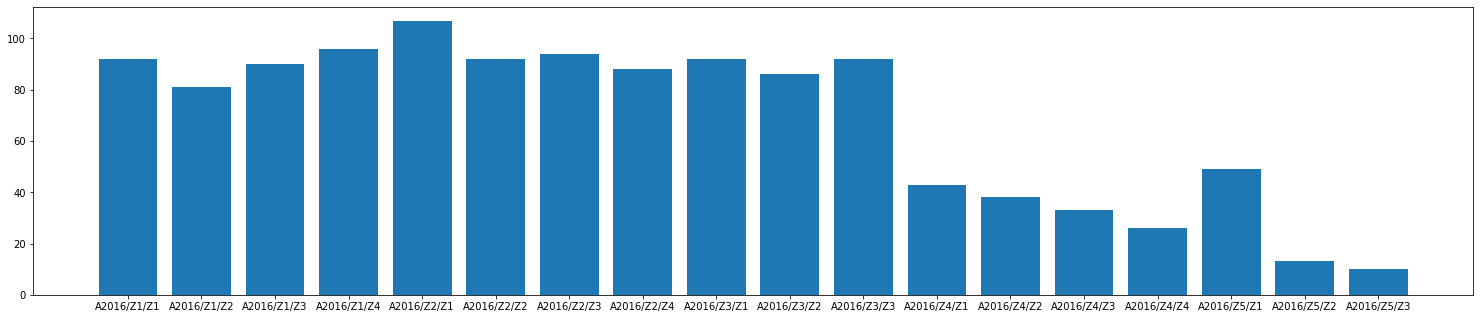

[92, 81, 90, 96, 107, 92, 94, 88, 92, 86, 92, 43, 38, 33, 26, 49, 13, 10]

In [9]:
# bar chart of nr of submitted assignments for just students that didn't fail
nr_submitted = []
for i in progressbar(range(len(sorted_submitted[0][1]))):
    aggregate = 0
    for student in sorted_submitted:
        if student[0] in didnt_fail:
            if student[1][i] != 0:
                aggregate +=1
            else:
                aggregate += 0
    nr_submitted.append(aggregate)

# with idf_df which takes 1% of possible matches as top-n
fig = plt.figure(figsize=(20,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(paths,nr_submitted)
plt.show()

nr_submitted

18/18
[475, 445, 456, 504, 559, 451, 476, 462, 442, 401, 417, 173, 152, 140, 108, 190, 48, 48]


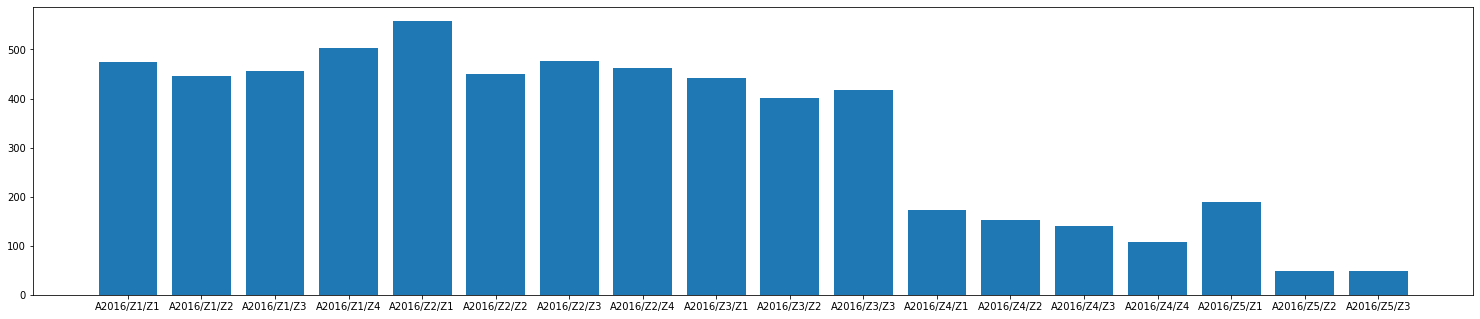

In [10]:
# bar chart of number of submitted assignments
nr_submitted = []
for i in progressbar(range(len(sorted_submitted[0][1]))):
    aggregate = 0
    for student in sorted_submitted:
        # print(i)
        if student[1][i] != 0:
            aggregate +=1
        else:
            aggregate += 0
    nr_submitted.append(aggregate)
print(nr_submitted)

# with idf_df which takes 1% of possible matches as top-n
fig = plt.figure(figsize=(20,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(paths,nr_submitted)
plt.show()

In [11]:
# dns, failed_stu, didnt_fail, plag, quit
print(len(dns), len(failed_students), len(didnt_fail), len(plag), len(quit_stu))

print(len(didnt_fail), len(set(didnt_fail) & plag))
print(len(failed_students), len(set(failed_students) & plag))
print(len(quit_stu), len(set(quit_stu) & plag))

NameError: name 'quit_stu' is not defined

In [414]:
# students that quit
submitted_sum_1 = []
submitted_sum_2 = []

quit = []

for student in sorted_submitted:
    submitted_sum_1.append(sum(student[1][:9]))
    submitted_sum_2.append(sum(student[1][9:]))

    if sum(student[1][9:]) == 0:
        print(student)
        quit.append(student[0])
        

cutoff1 = stat(submitted_sum_1)
cutoff2 = stat(submitted_sum_2)

for student in quit:
    tags_dict[student]['quit'] = True

i = 0
for x in submitted_active:
    if x[0] not in quit:
        i += 1
# yes = []
# quit_stu = []
# for student in sorted_submitted:
    
#     if student[1][9:-2].count(0) >= 5:
        
#         if student[0] not in dns:
#             quit_stu.append(student[0])
#             print(student)
#             tags_dict[student[0]]['quit'] = True
#         # if student[1].count(0) >= 9:
#         #     tags_dict[student[0]]['quit'] = True
# len(yes), len(no)

['student1758', [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['student6403', [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['student7665', [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['student1237', [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['student1278', [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['student1772', [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['student1976', [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['student2035', [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['student2234', [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['student2421', [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['student2567', [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['student2701', [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['student2717', [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
['student2736', [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

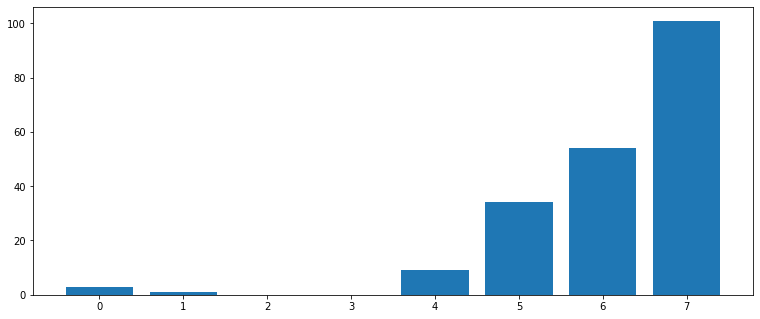

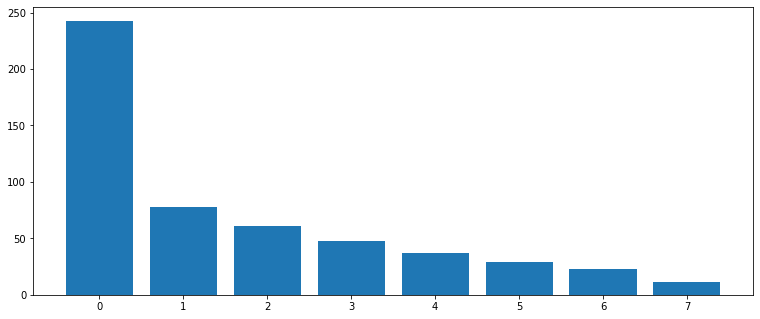

In [13]:
count = Counter(submitted_sum_1)
count_list = []
numbers = []
for x in range(len(count)):
    count_list.append(count[x])
    numbers.append(str(x))

fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(numbers,count_list)
plt.show()

count2 = Counter(submitted_sum_2)
count_list2 = []
numbers2 = []
for x in range(len(count2)):
    count_list2.append(count2[x])
    numbers2.append(str(x))

fig2 = plt.figure(figsize=(10,4))
ax = fig2.add_axes([0,0,1,1])
ax.bar(numbers2,count_list2)
plt.show()

In [415]:
# for x in tags_dict.items():
#     print(x)

pd.DataFrame(tags_dict).T

print(len(set(quit) & set(failed_students))/len(failed_students) * 100)

plag = set_oral_plag

len(plag & set(failed_students)), len(plag & set(failed_students)) / len(failed_students) * 100

tags_dict

20.867768595041323


{'student1013': {'failed': True, 'plagiarism': False, 'quit': False},
 'student1021': {'failed': True, 'plagiarism': True, 'quit': False},
 'student1029': {'failed': True, 'plagiarism': True, 'quit': False},
 'student1066': {'failed': True, 'plagiarism': False, 'quit': False},
 'student1110': {'failed': True, 'plagiarism': False, 'quit': True},
 'student1120': {'failed': True, 'plagiarism': True, 'quit': False},
 'student1132': {'failed': True, 'plagiarism': False, 'quit': False},
 'student1146': {'failed': False, 'plagiarism': False, 'quit': False},
 'student1176': {'failed': False, 'plagiarism': False, 'quit': False},
 'student1180': {'failed': True, 'plagiarism': False, 'quit': False},
 'student1188': {'failed': True, 'plagiarism': True, 'quit': False},
 'student1192': {'failed': False, 'plagiarism': True, 'quit': False},
 'student1200': {'failed': False, 'plagiarism': True, 'quit': False},
 'student1202': {'failed': True, 'plagiarism': True, 'quit': False},
 'student1220': {'failed

In [442]:
a, b, c = 0,0,0
for key, value in tags_dict.items():
    if value['failed'] == True:
        a += 1
    if value['plagiarism'] == True:
        b += 1
    if value['quit'] == True:
        c += 1

print(a, b, c)
a/len(sorted_submitted), b/len(sorted_submitted), c/len(sorted_submitted)


# for key, value in tags_dict.items():
#     print(key, value)

484 316 121


(0.7973640856672158, 0.5205930807248764, 0.19934102141680396)

In [418]:
# a = []

# for i in range(len(submitted_active[0][1][11:])):
#     sum_temp = 0
#     for student in submitted_active:
#         sum_temp += student[1][11:][i]
#     a.append(sum)

# print(a)
# pd.Series(a).plot.bar()

In [390]:
# import time
# counting = 0
# for ass in progressbar(range(len(paths))):
#     start = time.time()
#     for check in range(ass):
#         if check > 1:
#             check = check - 1
#         for test in range(5, 101, 5):
#             new_df = filtered_df[(filtered_df['percentage_a'] >= test) | (filtered_df['percentage_b'] >= test)] #MISSCHIEN DNS MENSEN ER UIT FILTEREN
#             temp_uni = unique_students(new_df)
#             print('nr of assignment:', ass+1, '|  nr of ass checked:', check+1, '|  percentage plag:', test, '|  nr stud plag:', len(temp_uni))
#             counting+= 1
#     end = time.time()
    # print(end-start)
            
                # print('ass:',ass,'check:', check+1,'method:', method, 'test:', test+1)

# counting

# idf_df = pd.DataFrame(columns=['ids','Student_A','Student_B','idf','compared_ngrams','A_total_compared','B_total_compared','assignment','percentage_a','percentage_b'])
#                     percentage = 1
#                     df_sorted = filter_df(filtered_df.sort_values('idf', ascending=False), [], 'A2016', False)
#                     nr_submissions = len(unique_students(complete_df[complete_df['assignment'] == paths[ass]]))
#                     potential_matches = nr_submissions * nr_submissions
#                     # print(potential_matches)
#                     rounded = round(potential_matches*(percentage/100))
#                     temp_df = df_sorted[df_sorted['assignment'] == paths[ass]]
#                     if rounded < 100:
#                         rounded = 100
#                     idf_df = pd.concat([idf_df, temp_df.nlargest(rounded, 'idf')])

nr of assignment: 2 |  nr of ass checked: 1 |  percentage plag: 5 |  nr stud plag: 607
nr of assignment: 2 |  nr of ass checked: 1 |  percentage plag: 10 |  nr stud plag: 607
nr of assignment: 2 |  nr of ass checked: 1 |  percentage plag: 15 |  nr stud plag: 606
nr of assignment: 2 |  nr of ass checked: 1 |  percentage plag: 20 |  nr stud plag: 604
nr of assignment: 2 |  nr of ass checked: 1 |  percentage plag: 25 |  nr stud plag: 601
nr of assignment: 2 |  nr of ass checked: 1 |  percentage plag: 30 |  nr stud plag: 597
nr of assignment: 2 |  nr of ass checked: 1 |  percentage plag: 35 |  nr stud plag: 593
nr of assignment: 2 |  nr of ass checked: 1 |  percentage plag: 40 |  nr stud plag: 590
nr of assignment: 2 |  nr of ass checked: 1 |  percentage plag: 45 |  nr stud plag: 579
nr of assignment: 2 |  nr of ass checked: 1 |  percentage plag: 50 |  nr stud plag: 569
nr of assignment: 2 |  nr of ass checked: 1 |  percentage plag: 55 |  nr stud plag: 544
nr of assignment: 2 |  nr of ass 

KeyboardInterrupt: 

In [455]:
def calc_quit(students, all_students):
    if type(students) != set:
        students = set(students)
    if type(all_students) != set:
        all_students = set(all_students)

    quit_tag = set()

    for key, value in tags_dict.items():
        if key in all_students:
            if value['quit'] == True:
                quit_tag.add(key)

    # quit
    tp_quit = len(students & quit_tag) # stud intersection tag
    fp_quit = len(students - quit_tag) # in stud but not in tag
    fn_quit = len((all_students-students) & quit_tag) # not in stud but in tag
    tn_quit = len(all_students - students - quit_tag) # not in stud not in tag
    precision_quit = tp_quit / (tp_quit + fp_quit)
    recall_quit = tp_quit / (tp_quit + fn_quit)
    if recall_quit == 1:
        print(tp_quit, (tp_quit, fn_quit))
    accuracy_quit = (tp_quit + tn_quit) / (tp_quit + tn_quit + fn_quit + fp_quit)

    return precision_quit, recall_quit, accuracy_quit

def calc_failed(students, all_students):
    if type(students) != set:
        students = set(students)
    if type(all_students) != set:
        all_students = set(all_students)

    failed_tag = set()

    for key, value in tags_dict.items():
        if key in all_students:
            if value['failed'] == True:
                failed_tag.add(key)

    # failed
    tp_failed = len(students & failed_tag) # stud intersection tag
    fp_failed = len(students - failed_tag) # in stud but not in tag
    fn_failed = len((all_students-students) & failed_tag) # not in stud but in tag
    tn_failed = len(all_students - students - failed_tag) # not in stud not in tag
    precision_failed = tp_failed / (tp_failed + fp_failed)
    recall_failed = tp_failed / (tp_failed + fn_failed)
    accuracy_quit = (tp_failed + tn_failed) / (tp_failed + tn_failed + fn_failed + fp_failed)

    return precision_failed, recall_failed, accuracy_quit

def calc_plag(students, all_students):
    if type(students) != set:
        students = set(students)
    if type(all_students) != set:
        all_students = set(all_students)
        
    plag_tag = set()

    for key, value in tags_dict.items():
        if key in all_students:
            if value['plagiarism'] == True:
                plag_tag.add(key)

    # plag
    tp_plag = len(students & plag_tag) # stud intersection tag
    fp_plag = len(students - plag_tag) # in stud but not in tag
    fn_plag = len((all_students-students) & plag_tag) # not in stud but in tag
    tn_plag = len(all_students - students - plag_tag) # not in stud not in tag
    precision_plag = tp_plag / (tp_plag + fp_plag)
    recall_plag = tp_plag / (tp_plag + fn_plag)
    accuracy_quit = (tp_plag + tn_plag) / (tp_plag + tn_plag + fn_plag + fp_plag)

    return precision_plag, recall_plag, accuracy_quit

def calc_f_scores(students, all_students, dropped):
    if type(students) != set:
        students = set(students)
    if type(all_students) != set:
        all_students = set(all_students)
        
    all_tags = set()

    for key, value in tags_dict.items():
        if key in all_students:
            if value['failed'] == True or value['plagiarism'] == True or value['quit'] == True:
                all_tags.add(key)

    all_tags = all_tags | set(dropped)

    # all
    tp_all = len(students & all_tags) # stud intersection tag
    fp_all = len(students - all_tags) # in stud but not in tag
    #fn_all = len(all_tags - students) # not in stud but in tag
    fn_all = len((all_students-students) & all_tags)
    tn_all = len(all_students - students - all_tags) # not in stud not in tag
#      FN = alle studenten door het model getagged zonder difficulty, die wel een difficulty hebben
#      TN = alle studenten door het model getagged zonder difficulty, die geen difficulty hebben
    print('tp:', tp_all, ' fp:', fp_all, ' fn:', fn_all, ' tn:', tn_all)
    print("")
    if tp_all + fp_all != 0:
        precision_all = tp_all / (tp_all + fp_all)
    else:
        precision_all = float('nan')

    # if tp_all + fn_all != 0:
    #     recall_all = tp_all / (tp_all + fn_all)
    # else:
    #     recall_all = 'nan'
    recall_all = tp_all / (tp_all + fn_all)

    accuracy_all = (tp_all + tn_all) / (tp_all + tn_all + fn_all + fp_all)

    if precision_all == 'nan':
        f1 = float('nan')
        f05 = float('nan')
    else:
        f1 = 2 * ((precision_all * recall_all) / (precision_all + recall_all))
        f05 = 1.25 * ((precision_all * recall_all) / (0.25 * precision_all + recall_all))

    return precision_all, recall_all, accuracy_all, f1, f05

In [20]:
for ass in progressbar(paths):
    start = time.time()
    for percentage in range(5, 101, 5):
        new_df = filtered_df[(filtered_df['percentage_a'] >= percentage) | (filtered_df['percentage_b'] >= percentage)] #MISSCHIEN DNS MENSEN ER UIT FILTEREN
        temp_uni_perc = unique_students(new_df)
        # temp_uni_perc = [student for student in temp_uni_perc if student not in dns]
        uni_temp_ass = unique_students(filtered_df)

        print('nr of assignment:', ass, '|  percentage plag:', percentage, '|  nr stud plag:', len(temp_uni_perc), '|  method: percentage')
        quit_precision, quit_recall, quit_accuracy = calc_quit(temp_uni_perc, uni_temp_ass)
        failed_precision, failed_recall, failed_accuracy = calc_failed(temp_uni_perc, uni_temp_ass)
        plag_precision, plag_recall, plag_accuracy = calc_plag(temp_uni_perc, uni_temp_ass)
        quit_f1 = 2 * ((quit_precision * quit_recall) / (quit_precision + quit_recall))
        failed_f1 = 2 * ((failed_precision * failed_recall) / (failed_precision + failed_recall))
        plag_f1 = 2 * ((plag_precision * plag_recall) / (plag_precision + plag_recall))
        
        print('quit precision, recall, accuracy, f1: ', quit_precision, "  |  ", quit_recall, "  |  ", quit_accuracy, "  |  ", quit_f1)
        print('failed precision, recall, accuracy, f1: ', failed_precision, "  |  ", failed_recall, "  |  ", failed_accuracy, "  |  ", failed_f1)
        print('plag precision, recall, accuracy, f1: ', plag_precision, "  |  ", plag_recall, "  |  ", plag_accuracy, "  |  ", plag_f1)
        print("")

        confusion_matrix_list.append(['percentage', ass, percentage, quit_precision, quit_recall, quit_accuracy, quit_f1, failed_precision, failed_recall, failed_accuracy, failed_f1, 
        plag_precision, plag_recall, plag_accuracy, plag_f1])

nr of assignment: A2016/Z1/Z1 |  percentage plag: 5 |  nr stud plag: 607 |  method: percentage
123 (123, 0)
quit precision, recall, accuracy, f1:  0.2026359143327842   |   1.0   |   0.2026359143327842   |   0.336986301369863
failed precision, recall, accuracy, f1:  0.6919275123558485   |   1.0   |   0.6919275123558485   |   0.8179162609542356
plag precision, recall, accuracy, f1:  0.5222405271828665   |   1.0   |   0.5222405271828665   |   0.6861471861471861

nr of assignment: A2016/Z1/Z1 |  percentage plag: 10 |  nr stud plag: 607 |  method: percentage
123 (123, 0)
quit precision, recall, accuracy, f1:  0.2026359143327842   |   1.0   |   0.2026359143327842   |   0.336986301369863
failed precision, recall, accuracy, f1:  0.6919275123558485   |   1.0   |   0.6919275123558485   |   0.8179162609542356
plag precision, recall, accuracy, f1:  0.5222405271828665   |   1.0   |   0.5222405271828665   |   0.6861471861471861

nr of assignment: A2016/Z1/Z1 |  percentage plag: 15 |  nr stud plag: 6

In [36]:
df_sorted = filtered_df.sort_values('idf', ascending=False)
for ass in progressbar(paths):
    for percentage in [0.1, 0.5, 1, 2]:
        idf_df = pd.DataFrame(columns=['ids','Student_A','Student_B','idf','compared_ngrams','A_total_compared','B_total_compared','assignment','percentage_a','percentage_b'])
        nr_submissions = len(unique_students(complete_df[complete_df['assignment'] == ass]))
        potential_matches = nr_submissions * nr_submissions
        # print(potential_matches)
        rounded = round(potential_matches*(percentage/100))
        temp_df = df_sorted[df_sorted['assignment'] == ass]
        uni_temp_ass = unique_students(temp_df)
        if rounded < 50:
            rounded = 50
        
        idf_df = pd.concat([idf_df, temp_df.nlargest(rounded, 'idf')])
        temp_uni_idf = unique_students(idf_df)
        print('assignment:', ass, '|  percentage top-n:', percentage, '|  top-n:', rounded, '|  students:', len(temp_uni_idf), '|  method: top-n idf')

        quit_precision, quit_recall, quit_accuracy = calc_quit(temp_uni_idf, uni_temp_ass)
        failed_precision, failed_recall, failed_accuracy = calc_failed(temp_uni_idf, uni_temp_ass)
        plag_precision, plag_recall, plag_accuracy = calc_plag(temp_uni_idf, uni_temp_ass)
        if quit_precision + quit_recall == 0:
            quit_f1 = float('nan')
        else:
            quit_f1 = 2 * ((quit_precision * quit_recall) / (quit_precision + quit_recall))
        failed_f1 = 2 * ((failed_precision * failed_recall) / (failed_precision + failed_recall))
        plag_f1 = 2 * ((plag_precision * plag_recall) / (plag_precision + plag_recall))
        
        print('quit precision, recall, accuracy, f1: ', quit_precision, "  |  ", quit_recall, "  |  ", quit_accuracy, "  |  ", quit_f1)
        print('failed precision, recall, accuracy, f1: ', failed_precision, "  |  ", failed_recall, "  |  ", failed_accuracy, "  |  ", failed_f1)
        print('plag precision, recall, accuracy, f1: ', plag_precision, "  |  ", plag_recall, "  |  ", plag_accuracy, "  |  ", plag_f1)
        print("")

        confusion_matrix_list.append(['idf top-n', ass, percentage, quit_precision, quit_recall, quit_accuracy, quit_f1, failed_precision, failed_recall, failed_accuracy, failed_f1,
        plag_precision, plag_recall, plag_accuracy, plag_f1])

assignment: A2016/Z1/Z1 |  percentage top-n: 0.1 |  top-n: 298 |  students: 279 |  method: top-n idf
quit precision, recall, accuracy, f1:  0.21505376344086022   |   0.4878048780487805   |   0.4268292682926829   |   0.29850746268656714
failed precision, recall, accuracy, f1:  0.7562724014336918   |   0.5023809523809524   |   0.4917431192660551   |   0.603719599427754
plag precision, recall, accuracy, f1:  0.5304659498207885   |   0.4668769716088328   |   0.4339622641509434   |   0.4966442953020134

assignment: A2016/Z1/Z1 |  percentage top-n: 0.5 |  top-n: 1491 |  students: 400 |  method: top-n idf
quit precision, recall, accuracy, f1:  0.2325   |   0.7560975609756098   |   0.3150406504065041   |   0.35564053537284895
failed precision, recall, accuracy, f1:  0.75   |   0.7142857142857143   |   0.5963302752293578   |   0.7317073170731706
plag precision, recall, accuracy, f1:  0.5425   |   0.6845425867507886   |   0.4660377358490566   |   0.6052998605299861

assignment: A2016/Z1/Z1 |  pe

In [38]:
# for key, value in tags_dict.items():
#     if value['quit'] == True:
#         print(value)
def print_df(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', 20, 'display.width', 500):
        print(df)

matrix_df = pd.DataFrame(confusion_matrix_list, columns=['method', 'assignment', 'percentage', 'quit_precision', 'quit_recall', 'quit_accuracy', 'quit_f1', 
'failed_precision', 'failed_recall', 'failed_accuracy', 'failed_f1', 'plag_precision', 'plag_recall', 'plag_accuracy', 'plag_f1']).round(4)

sort_on = ['failed_f1']
print_df(matrix_df.sort_values(sort_on, ascending=False))

       method   assignment  percentage  quit_precision  quit_recall  quit_accuracy  quit_f1  failed_precision  failed_recall  failed_accuracy  failed_f1  plag_precision  plag_recall  plag_accuracy  plag_f1
19  idf top-n  A2016/Z2/Z1         2.0          0.2160       0.9675         0.2256   0.3531            0.7314         0.9595           0.7105     0.8301          0.5263       0.9148         0.5043   0.6682
18  idf top-n  A2016/Z2/Z1         1.0          0.2117       0.8862         0.2540   0.3417            0.7262         0.8905           0.6719     0.8000          0.5320       0.8644         0.5112   0.6587
31  idf top-n  A2016/Z2/Z4         2.0          0.2050       0.7398         0.2143   0.3210            0.7680         0.8119           0.6546     0.7894          0.5135       0.7192         0.4373   0.5992
27  idf top-n  A2016/Z2/Z3         2.0          0.2112       0.7642         0.2354   0.3310            0.7573         0.8024           0.6443     0.7792          0.5236       0

In [32]:
# dict of students as key and a list of which assignments they submitted as values
dict_sorted_submitted = {}
for student in sorted_submitted:
    dict_sorted_submitted[student[0]] = student[1]

dict_sorted_submitted

{'student9538': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'student9972': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'student2675': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 'student3567': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 'student4415': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
 'student4766': [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'student5744': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 'student7320': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 'student9315': [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'student9823': [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'student1192': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1],
 'student1317': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
 'student2142': [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 'student3841': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [109]:
# getting the results from the different methods
interesting_students_dict = {}
interesting_students_list = []
percentages = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
idfs = [0.1, 0.5, 1, 2]
for ass in progressbar(paths):
    for percentage in percentages:
        new_df = filtered_df[filtered_df['assignment'] == ass]
        new_df = new_df[(new_df['percentage_a'] >= percentage) | (new_df['percentage_b'] >= percentage)]
        temp_uni_perc = unique_students(new_df)
        # print(new_df)
        # print(len(temp_uni_perc))
        # interesting_students_list['percentage'] = {percentage:[ass, temp_uni_perc]}
        interesting_students_list.append(['percentage', ass, percentage, temp_uni_perc])
        # print(ass, percentage, len(temp_uni_perc))
    
    for percentage in idfs:
        idf_df = pd.DataFrame(columns=['ids','Student_A','Student_B','idf','compared_ngrams','A_total_compared','B_total_compared','assignment','percentage_a','percentage_b'])
        nr_submissions = len(unique_students(complete_df[complete_df['assignment'] == ass]))
        potential_matches = nr_submissions * nr_submissions
        rounded = round(potential_matches*(percentage/100))
        temp_df = df_sorted[df_sorted['assignment'] == ass]
        uni_temp_ass = unique_students(temp_df)
        if rounded < 50:
            rounded = 50
        
        idf_df = pd.concat([idf_df, temp_df.nlargest(rounded, 'idf')])
        temp_uni_idf = unique_students(idf_df)

        # interesting_students_list['idf'] = {percentage:[ass, temp_uni_perc]}
        interesting_students_list.append(['idf', ass, percentage, temp_uni_perc, rounded])

df_interesting_students = pd.DataFrame(interesting_students_list, columns=['method', 'assignment', 'percentage', 'students', 'rounded'])

18/18


In [115]:
df_interesting_students[df_interesting_students['percentage'] == 2]

method   assignment  percentage  \
23     idf  A2016/Z1/Z1         2.0   
47     idf  A2016/Z1/Z2         2.0   
71     idf  A2016/Z1/Z3         2.0   
95     idf  A2016/Z1/Z4         2.0   
119    idf  A2016/Z2/Z1         2.0   
143    idf  A2016/Z2/Z2         2.0   
167    idf  A2016/Z2/Z3         2.0   
191    idf  A2016/Z2/Z4         2.0   
215    idf  A2016/Z3/Z1         2.0   
239    idf  A2016/Z3/Z2         2.0   
263    idf  A2016/Z3/Z3         2.0   
287    idf  A2016/Z4/Z1         2.0   
311    idf  A2016/Z4/Z2         2.0   
335    idf  A2016/Z4/Z3         2.0   
359    idf  A2016/Z4/Z4         2.0   
383    idf  A2016/Z5/Z1         2.0   
407    idf  A2016/Z5/Z2         2.0   
431    idf  A2016/Z5/Z3         2.0   

                                              students  rounded  
23   [student1278, student1422, student1476, studen...   5962.0  
47   [student1029, student1066, student1176, studen...   5962.0  
71   [student1278, student1422, student1453, studen...   5387.0  
95   [student1266, student1278, student1422, studen...   5810.0  
119  [student1278, student1422, student1476, studen...   6384.0  
143  [student1029, student1278, student1422, studen...   5660.0  
167  [student1266, student1278, student1422, studen...   5639.0  
191  [student1029, student1202, student1278, studen...   5161.0  
215  [student1422, student1424, student1476, studen...   5020.0  
239  [student1029, student1180, student1424, studen...   3837.0  
263  [student1029, student1180, student1200, studen...   3890.0  
287  [student1029, student1192, student1453, studen...    776.0  
311  [student1453, student1547, student1738, studen...    641.0  
335  [student1192, student1453, student1616, studen...    474.0  
359  [student1192, student1738, student1938, studen...    308.0  
383  [student1029, student1192, student1202, studen...    986.0  
407  [student2142, student2160, student2464, studen...     56.0  
431  [student1192, student1477, student1833, studen...     67.0

In [ ]:
'''
voor elke methode ~
    voor elk percentage ~
        loop door de opdrachten in sequentie ~
            drop mensen met te weinig opdrachten
                check op aantal overeenkomende opdrachten
                    doe check en gedropte mensen samen
                        bereken van deze groep de confusion matrix en de f-scores
'''

In [364]:
i = 0
for key, value in tags_dict.items():
    if value['quit'] == True:
        i += 1
    elif value['plagiarism'] == True:
        i += 1
    elif value['failed'] == True:
        i += 1

i, len(uni_filtered), i/len(uni_filtered)*100

(558, 607, 91.92751235584844)

In [296]:
interesting_students_list

filtered_df[filtered_df.assignment.str.contains('Z1/Z1|Z1/Z2')]
assign = ""
students = []

for path in paths:
    if assign == "":
        assign = path
    else:
        assign = assign + '|' + path

    temp_students = unique_students(filtered_df[filtered_df.assignment.str.contains(assign)])
    # print(len(temp_students))
    # print(path)
    students.append(temp_students)

In [456]:
df_interesting_students = pd.DataFrame(interesting_students_list, columns=['method', 'assignment', 'percentage', 'students', 'rounded'])
confusion_matrix_list = []
confusion_matrix_list_dropped = []

for percentage in idfs:
    temp_df_perc = df_interesting_students[(df_interesting_students.method.str.contains('idf') & (df_interesting_students['percentage'] == percentage))].sort_values('assignment', ascending=True)
    temp_lol_students = temp_df_perc.students.to_list()
    temp_ass = temp_df_perc.assignment.to_list()
    print('!!-- ', percentage, ' --!!')
    
    for ass in range(len(paths)):
        for sequence in range(ass+1):
            print('nr assignments: ', ass+1, 'required: ', sequence+1, temp_ass[ass])
            test_all_students = students[ass]

            # list of all students from all assignemnts that are looked at
            temp_all_students = [student for lists in temp_lol_students[:sequence+1] for student in lists]
            temp_set_all_students = set(temp_all_students)
            not_dropped = []
            dropped = []
                    
            # for each student, check if they have submitted enough assignments to be compared
            for student in temp_set_all_students:
                if dict_sorted_submitted[student][:sequence+1].count(1) >= sequence+1:
                    not_dropped.append(student)
                else:
                    dropped.append(student)

            difficulty = []
            no_difficulty = []

            # for each student that has submitted enough, check how many times they were marked as interesting
            for student in not_dropped:
                if temp_all_students.count(student) >= sequence+1:
                    difficulty.append(student)
                else:
                    no_difficulty.append(student)

            print('nr of students:', len(temp_set_all_students), '| not dropped:', len(not_dropped))
            print('difficulty:', len(difficulty), '| no difficulty:', len(no_difficulty))
            print('noise:', len(dropped), '| all students:', len(uni_filtered))

            quit_precision, quit_recall, quit_accuracy = calc_quit(difficulty, uni_filtered)
            failed_precision, failed_recall, failed_accuracy = calc_failed(difficulty, uni_filtered)
            plag_precision, plag_recall, plag_accuracy = calc_plag(difficulty, uni_filtered)
            if quit_precision + quit_recall == 0:
                quit_f1 = float('nan')
                quit_f05 = float('nan')
            else:
                quit_f1 = 2 * ((quit_precision * quit_recall) / (quit_precision + quit_recall))
                quit_f05 = 1.25 * ((quit_precision * quit_recall) / (0.25 * quit_precision + quit_recall))
            failed_f1 = 2 * ((failed_precision * failed_recall) / (failed_precision + failed_recall))
            failed_f05 = 1.25 * ((failed_precision * failed_recall) / (0.25 * failed_precision + failed_recall))
            plag_f1 = 2 * ((plag_precision * plag_recall) / (plag_precision + plag_recall))
            plag_f05 = 1.25 * ((plag_precision * plag_recall) / (0.25 * plag_precision + plag_recall))

            all_precision, all_recall, all_accuracy, all_f1, all_f05 = calc_f_scores(difficulty, uni_filtered, dropped)
            dropped_precision, dropped_recall, dropped_accuracy, dropped_f1, dropped_f05 = calc_f_scores(dropped, uni_filtered, dropped)

            confusion_matrix_list.append(['idf', ass+1, sequence+1, percentage, quit_f1, quit_f05, plag_f1, plag_f05, failed_f1, failed_f05, all_precision, all_recall, all_accuracy, all_f1, all_f05])
            confusion_matrix_list_dropped.append(['idf', ass+1, sequence+1, percentage, dropped_precision, dropped_recall, dropped_accuracy, dropped_f1, dropped_f05])

for percentage in percentages:
    temp_df_perc = df_interesting_students[(df_interesting_students.method.str.contains('percentage') & (df_interesting_students['percentage'] == percentage))].sort_values('assignment', ascending=True)
    temp_lol_students = temp_df_perc.students.to_list()
    temp_ass = temp_df_perc.assignment.to_list()
    print('!!-- ', percentage, ' --!!')
    
    for ass in range(len(paths)):
        for sequence in range(ass+1):
            print('nr assignments: ', ass+1, 'required: ', sequence+1, temp_ass[ass])
            # print(paths[:sequence])
            test_all_students = students[ass]

            # list of all students from all assignemnts that are looked at
            temp_all_students = [student for lists in temp_lol_students[:sequence+1] for student in lists]
            temp_set_all_students = set(temp_all_students)
            not_dropped = []
            dropped = []
                    
            # for each student, check if they have submitted enough assignments to be compared
            for student in temp_set_all_students:
                if dict_sorted_submitted[student][:sequence+1].count(1) >= sequence+1:
                    not_dropped.append(student)
                else:
                    dropped.append(student)

            difficulty = []
            no_difficulty = []

            # for each student that has submitted enough, check how many times they were marked as interesting
            for student in not_dropped:
                if temp_all_students.count(student) >= sequence+1:
                    difficulty.append(student)
                else:
                    no_difficulty.append(student)

            print('nr of students:', len(temp_set_all_students), '| not dropped:', len(not_dropped))
            print('difficulty:', len(difficulty), '| no difficulty:', len(no_difficulty))
            print('noise:', len(dropped), '| all students:', len(uni_filtered))

            quit_precision, quit_recall, quit_accuracy = calc_quit(difficulty, uni_filtered)
            failed_precision, failed_recall, failed_accuracy = calc_failed(difficulty, uni_filtered)
            plag_precision, plag_recall, plag_accuracy = calc_plag(difficulty, uni_filtered)
            if quit_precision + quit_recall == 0:
                quit_f1 = float('nan')
                quit_f05 = float('nan')
            else:
                quit_f1 = 2 * ((quit_precision * quit_recall) / (quit_precision + quit_recall))
                quit_f05 = 1.25 * ((quit_precision * quit_recall) / (0.25 * quit_precision + quit_recall))
            failed_f1 = 2 * ((failed_precision * failed_recall) / (failed_precision + failed_recall))
            failed_f05 = 1.25 * ((failed_precision * failed_recall) / (0.25 * failed_precision + failed_recall))
            plag_f1 = 2 * ((plag_precision * plag_recall) / (plag_precision + plag_recall))
            plag_f05 = 1.25 * ((plag_precision * plag_recall) / (0.25 * plag_precision + plag_recall))

            all_precision, all_recall, all_accuracy, all_f1, all_f05 = calc_f_scores(difficulty, uni_filtered, dropped)
            dropped_precision, dropped_recall, dropped_accuracy, dropped_f1, dropped_f05 = calc_f_scores(dropped, uni_filtered, dropped)

            confusion_matrix_list.append(['percentage', ass+1, sequence+1, percentage, quit_f1, quit_f05, plag_f1, plag_f05, failed_f1, failed_f05, all_precision, all_recall, all_accuracy, all_f1, all_f05])
            confusion_matrix_list_dropped.append(['percentage', ass+1, sequence+1, percentage, dropped_precision, dropped_recall, dropped_accuracy, dropped_f1, dropped_f05])

!!--  0.1  --!!
nr assignments:  1 required:  1 A2016/Z1/Z1
nr of students: 129 | not dropped: 129
difficulty: 129 | no difficulty: 0
noise: 0 | all students: 607
tp: 120  fp: 9  fn: 438  tn: 40

tp: 0  fp: 0  fn: 558  tn: 49

nr assignments:  2 required:  1 A2016/Z1/Z2
nr of students: 129 | not dropped: 129
difficulty: 129 | no difficulty: 0
noise: 0 | all students: 607
tp: 120  fp: 9  fn: 438  tn: 40

tp: 0  fp: 0  fn: 558  tn: 49

nr assignments:  2 required:  2 A2016/Z1/Z2
nr of students: 176 | not dropped: 138
difficulty: 99 | no difficulty: 39
noise: 38 | all students: 607
tp: 92  fp: 7  fn: 469  tn: 39

tp: 38  fp: 0  fn: 523  tn: 46

nr assignments:  3 required:  1 A2016/Z1/Z3
nr of students: 129 | not dropped: 129
difficulty: 129 | no difficulty: 0
noise: 0 | all students: 607
tp: 120  fp: 9  fn: 438  tn: 40

tp: 0  fp: 0  fn: 558  tn: 49

nr assignments:  3 required:  2 A2016/Z1/Z3
nr of students: 176 | not dropped: 138
difficulty: 99 | no difficulty: 39
noise: 38 | all stude

In [458]:
df_interesting_students = pd.DataFrame(interesting_students_list, columns=['method', 'assignment', 'percentage', 'students', 'rounded'])
confusion_matrix_list2 = []
confusion_matrix_list_dropped2 = []

for percentage in idfs:
    temp_df_perc = df_interesting_students[(df_interesting_students.method.str.contains('idf') & (df_interesting_students['percentage'] == percentage))].sort_values('assignment', ascending=True)
    temp_lol_students = temp_df_perc.students.to_list()
    temp_ass = temp_df_perc.assignment.to_list()
    print('!!-- ', percentage, ' --!!')
    
    for ass in range(len(paths)):
        for sequence in range(ass+1):
            print('nr assignments: ', ass+1, 'required: ', sequence+1, temp_ass[ass])
            test_all_students = students[ass]

            # list of all students from all assignemnts that are looked at
            temp_all_students = [student for lists in temp_lol_students[:sequence+1] for student in lists]
            temp_set_all_students = set(temp_all_students)
            not_dropped = []
            dropped = []
                    
            # for each student, check if they have submitted enough assignments to be compared
            for student in temp_set_all_students:
                if dict_sorted_submitted[student][:sequence+1].count(1) >= sequence+1:
                    not_dropped.append(student)
                    
            for student in uni_filtered:
                if dict_sorted_submitted[student][:sequence+1].count(1) >= sequence+1:
                    dropped.append(student)

            difficulty = []
            no_difficulty = []

            # for each student that has submitted enough, check how many times they were marked as interesting
            for student in not_dropped:
                if temp_all_students.count(student) >= sequence+1:
                    difficulty.append(student)
                else:
                    no_difficulty.append(student)

            print('nr of students:', len(temp_set_all_students), '| not dropped:', len(not_dropped))
            print('difficulty:', len(difficulty), '| no difficulty:', len(no_difficulty))
            print('noise:', len(dropped), '| all students:', len(uni_filtered))

            quit_precision, quit_recall, quit_accuracy = calc_quit(difficulty, uni_filtered)
            failed_precision, failed_recall, failed_accuracy = calc_failed(difficulty, uni_filtered)
            plag_precision, plag_recall, plag_accuracy = calc_plag(difficulty, uni_filtered)
            if quit_precision + quit_recall == 0:
                quit_f1 = float('nan')
                quit_f05 = float('nan')
            else:
                quit_f1 = 2 * ((quit_precision * quit_recall) / (quit_precision + quit_recall))
                quit_f05 = 1.25 * ((quit_precision * quit_recall) / (0.25 * quit_precision + quit_recall))
            failed_f1 = 2 * ((failed_precision * failed_recall) / (failed_precision + failed_recall))
            failed_f05 = 1.25 * ((failed_precision * failed_recall) / (0.25 * failed_precision + failed_recall))
            plag_f1 = 2 * ((plag_precision * plag_recall) / (plag_precision + plag_recall))
            plag_f05 = 1.25 * ((plag_precision * plag_recall) / (0.25 * plag_precision + plag_recall))

            all_precision, all_recall, all_accuracy, all_f1, all_f05 = calc_f_scores(difficulty, uni_filtered, dropped)
            dropped_precision, dropped_recall, dropped_accuracy, dropped_f1, dropped_f05 = calc_f_scores(dropped, uni_filtered, dropped)

            confusion_matrix_list2.append(['idf', ass+1, sequence+1, percentage, quit_f1, quit_f05, plag_f1, plag_f05, failed_f1, failed_f05, all_precision, all_recall, all_accuracy, all_f1, all_f05])
            confusion_matrix_list_dropped2.append(['idf', ass+1, sequence+1, percentage, dropped_precision, dropped_recall, dropped_accuracy, dropped_f1, dropped_f05])

for percentage in percentages:
    temp_df_perc = df_interesting_students[(df_interesting_students.method.str.contains('percentage') & (df_interesting_students['percentage'] == percentage))].sort_values('assignment', ascending=True)
    temp_lol_students = temp_df_perc.students.to_list()
    temp_ass = temp_df_perc.assignment.to_list()
    print('!!-- ', percentage, ' --!!')
    
    for ass in range(len(paths)):
        for sequence in range(ass+1):
            print('nr assignments: ', ass+1, 'required: ', sequence+1, temp_ass[ass])
            # print(paths[:sequence])
            test_all_students = students[ass]

            # list of all students from all assignemnts that are looked at
            temp_all_students = [student for lists in temp_lol_students[:sequence+1] for student in lists]
            temp_set_all_students = set(temp_all_students)
            not_dropped = []
            dropped = []
                    
            # for each student, check if they have submitted enough assignments to be compared
            for student in temp_set_all_students:
                if dict_sorted_submitted[student][:sequence+1].count(1) >= sequence+1:
                    not_dropped.append(student)
            
            for student in uni_filtered:
                if dict_sorted_submitted[student][:sequence+1].count(1) >= sequence+1:
                    dropped.append(student)

            difficulty = []
            no_difficulty = []

            # for each student that has submitted enough, check how many times they were marked as interesting
            for student in not_dropped:
                if temp_all_students.count(student) >= sequence+1:
                    difficulty.append(student)
                else:
                    no_difficulty.append(student)

            print('nr of students:', len(temp_set_all_students), '| not dropped:', len(not_dropped))
            print('difficulty:', len(difficulty), '| no difficulty:', len(no_difficulty))
            print('noise:', len(dropped), '| all students:', len(uni_filtered))

            quit_precision, quit_recall, quit_accuracy = calc_quit(difficulty, uni_filtered)
            failed_precision, failed_recall, failed_accuracy = calc_failed(difficulty, uni_filtered)
            plag_precision, plag_recall, plag_accuracy = calc_plag(difficulty, uni_filtered)
            if quit_precision + quit_recall == 0:
                quit_f1 = float('nan')
                quit_f05 = float('nan')
            else:
                quit_f1 = 2 * ((quit_precision * quit_recall) / (quit_precision + quit_recall))
                quit_f05 = 1.25 * ((quit_precision * quit_recall) / (0.25 * quit_precision + quit_recall))
            failed_f1 = 2 * ((failed_precision * failed_recall) / (failed_precision + failed_recall))
            failed_f05 = 1.25 * ((failed_precision * failed_recall) / (0.25 * failed_precision + failed_recall))
            plag_f1 = 2 * ((plag_precision * plag_recall) / (plag_precision + plag_recall))
            plag_f05 = 1.25 * ((plag_precision * plag_recall) / (0.25 * plag_precision + plag_recall))

            all_precision, all_recall, all_accuracy, all_f1, all_f05 = calc_f_scores(difficulty, uni_filtered, dropped)
            dropped_precision, dropped_recall, dropped_accuracy, dropped_f1, dropped_f05 = calc_f_scores(dropped, uni_filtered, dropped)

            confusion_matrix_list2.append(['percentage', ass+1, sequence+1, percentage, quit_f1, quit_f05, plag_f1, plag_f05, failed_f1, failed_f05, all_precision, all_recall, all_accuracy, all_f1, all_f05])
            confusion_matrix_list_dropped2.append(['percentage', ass+1, sequence+1, percentage, dropped_precision, dropped_recall, dropped_accuracy, dropped_f1, dropped_f05])

!!--  0.1  --!!
nr assignments:  1 required:  1 A2016/Z1/Z1
nr of students: 129 | not dropped: 129
difficulty: 129 | no difficulty: 0
noise: 475 | all students: 607
tp: 129  fp: 0  fn: 466  tn: 12

tp: 475  fp: 0  fn: 120  tn: 12

nr assignments:  2 required:  1 A2016/Z1/Z2
nr of students: 129 | not dropped: 129
difficulty: 129 | no difficulty: 0
noise: 475 | all students: 607
tp: 129  fp: 0  fn: 466  tn: 12

tp: 475  fp: 0  fn: 120  tn: 12

nr assignments:  2 required:  2 A2016/Z1/Z2
nr of students: 176 | not dropped: 138
difficulty: 99 | no difficulty: 39
noise: 386 | all students: 607
tp: 99  fp: 0  fn: 490  tn: 18

tp: 386  fp: 0  fn: 203  tn: 18

nr assignments:  3 required:  1 A2016/Z1/Z3
nr of students: 129 | not dropped: 129
difficulty: 129 | no difficulty: 0
noise: 475 | all students: 607
tp: 129  fp: 0  fn: 466  tn: 12

tp: 475  fp: 0  fn: 120  tn: 12

nr assignments:  3 required:  2 A2016/Z1/Z3
nr of students: 176 | not dropped: 138
difficulty: 99 | no difficulty: 39
noise: 

In [454]:
# using uni_filtered and no dropped
test_df = pd.DataFrame(confusion_matrix_list, columns=['method', 'total', 'required', 'percentage', 'quit_f1', 'quit_f05', 'plag_f1', 'plag_f05', 'failed_f1', 'failed_f05', 'all_precision', 'all_recall', 'all_accuracy', 'all_f1', 'all_f05'])

print_df(test_df.sort_values(['all_f05', 'required'], ascending=[False, True]))
# print_df(test_df[test_df['percentage'] == 15])

# test_df.sort_values(['all_f05', 'required'], ascending=[False, True]).to_csv('results f05 sorted with dropped.csv')

          method  total  required  percentage   quit_f1  quit_f05   plag_f1  plag_f05  failed_f1  failed_f05  all_precision  all_recall  all_accuracy    all_f1   all_f05
684   percentage      1         1         5.0  0.258824  0.190878  0.658228  0.587703   0.793319    0.798319       0.921941    0.783154      0.739703  0.846899  0.890383
685   percentage      2         1         5.0  0.258824  0.190878  0.658228  0.587703   0.793319    0.798319       0.921941    0.783154      0.739703  0.846899  0.890383
687   percentage      3         1         5.0  0.258824  0.190878  0.658228  0.587703   0.793319    0.798319       0.921941    0.783154      0.739703  0.846899  0.890383
690   percentage      4         1         5.0  0.258824  0.190878  0.658228  0.587703   0.793319    0.798319       0.921941    0.783154      0.739703  0.846899  0.890383
694   percentage      5         1         5.0  0.258824  0.190878  0.658228  0.587703   0.793319    0.798319       0.921941    0.783154      0.739703 

In [457]:
# uni filtered and only dropped from difficulty
test_df = pd.DataFrame(confusion_matrix_list, columns=['method', 'total', 'required', 'percentage', 'quit_f1', 'quit_f05', 'plag_f1', 'plag_f05', 'failed_f1', 'failed_f05', 'all_precision', 'all_recall', 'all_accuracy', 'all_f1', 'all_f05'])

print_df(test_df.sort_values(['all_f05', 'required'], ascending=[False, True]))

          method  total  required  percentage   quit_f1  quit_f05   plag_f1  plag_f05  failed_f1  failed_f05  all_precision  all_recall  all_accuracy    all_f1   all_f05
684   percentage      1         1         5.0  0.258824  0.190878  0.658228  0.587703   0.793319    0.798319       0.921941    0.783154      0.739703  0.846899  0.890383
685   percentage      2         1         5.0  0.258824  0.190878  0.658228  0.587703   0.793319    0.798319       0.921941    0.783154      0.739703  0.846899  0.890383
687   percentage      3         1         5.0  0.258824  0.190878  0.658228  0.587703   0.793319    0.798319       0.921941    0.783154      0.739703  0.846899  0.890383
690   percentage      4         1         5.0  0.258824  0.190878  0.658228  0.587703   0.793319    0.798319       0.921941    0.783154      0.739703  0.846899  0.890383
694   percentage      5         1         5.0  0.258824  0.190878  0.658228  0.587703   0.793319    0.798319       0.921941    0.783154      0.739703 

In [464]:
# uni filtered and dropped from entire course
test_df = pd.DataFrame(confusion_matrix_list2, columns=['method', 'total', 'required', 'percentage', 'quit_f1', 'quit_f05', 'plag_f1', 'plag_f05', 'failed_f1', 'failed_f05', 'all_precision', 'all_recall', 'all_accuracy', 'all_f1', 'all_f05'])

print_df(test_df.sort_values(['all_f05', 'required'], ascending=[False, True])[['method', 'total', 'required', 'percentage','all_precision', 'all_recall', 'all_f1', 'all_f05']])
# test_df.sort_values(['all_f05', 'required'], ascending=[False, True]).to_csv('results f05 sorted with all dropped.csv')

          method  total  required  percentage  all_precision  all_recall    all_f1   all_f05
684   percentage      1         1         5.0            1.0    0.796639  0.886810  0.951425
685   percentage      2         1         5.0            1.0    0.796639  0.886810  0.951425
687   percentage      3         1         5.0            1.0    0.796639  0.886810  0.951425
690   percentage      4         1         5.0            1.0    0.796639  0.886810  0.951425
694   percentage      5         1         5.0            1.0    0.796639  0.886810  0.951425
699   percentage      6         1         5.0            1.0    0.796639  0.886810  0.951425
705   percentage      7         1         5.0            1.0    0.796639  0.886810  0.951425
712   percentage      8         1         5.0            1.0    0.796639  0.886810  0.951425
720   percentage      9         1         5.0            1.0    0.796639  0.886810  0.951425
729   percentage     10         1         5.0            1.0    0.7966

In [ ]:
# uni filtered and dropped from entire course
test_df = pd.DataFrame(confusion_matrix_list, columns=['method', 'total', 'required', 'percentage', 'quit_f1', 'quit_f05', 'plag_f1', 'plag_f05', 'failed_f1', 'failed_f05', 'all_precision', 'all_recall', 'all_accuracy', 'all_f1', 'all_f05'])

print_df(test_df.sort_values(['all_f05', 'required'], ascending=[False, True]))

In [358]:
test_df = pd.DataFrame(confusion_matrix_list_dropped, columns=['method', 'total', 'required', 'percentage', 'dropped_precision', 'dropped_recall', 'dropped_accuracy', 'dropped_f1', 'dropped_f05'])

print_df(test_df.sort_values(['dropped_f05', 'required'], ascending=[False, True]))

test_df.sort_values(['dropped_f05', 'required'], ascending=[False, True]).to_csv('results f05 sorted dropped.csv')

          method  total  required  percentage  dropped_precision  dropped_recall  dropped_accuracy  dropped_f1  dropped_f05
819   percentage     16        16         5.0           0.922948        0.989228          0.914191    0.954939     0.935484
835   percentage     17        16         5.0           0.922948        0.989228          0.914191    0.954939     0.935484
990   percentage     16        16        10.0           0.922948        0.989228          0.914191    0.954939     0.935484
1006  percentage     17        16        10.0           0.922948        0.989228          0.914191    0.954939     0.935484
1161  percentage     16        16        15.0           0.922948        0.989228          0.914191    0.954939     0.935484
1177  percentage     17        16        15.0           0.922948        0.989228          0.914191    0.954939     0.935484
974   percentage     15        15        10.0           0.923858        0.983784          0.910596    0.952880     0.935252
1145  pe